In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [13]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df = df[['sepal_width','petal_length','petal_width','species']]

In [15]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [17]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [18]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [39]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='petal_length',
                    y='petal_width',
                    z='sepal_width',
                    color='species')


fig.show()


# Applying PCA

### step 1. mean centering

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])


In [25]:
df.head()

,sepal_width,petal_length,petal_width,species
0,1.032057,-1.341272,-1.312977,0
1,-0.124958,-1.341272,-1.312977,0
2,0.337848,-1.398138,-1.312977,0
3,0.106445,-1.284407,-1.312977,0
4,1.263460,-1.341272,-1.312977,0


### step 2. find covariance matrix

In [27]:
cov_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
cov_matrix

array([[ 1.00671141, -0.42333835, -0.358937  ],
       [-0.42333835,  1.00671141,  0.96921855],
       [-0.358937  ,  0.96921855,  1.00671141]])

### step 3. find eigen value and eigen vectors

In [28]:
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)

In [29]:
eigen_value

array([2.22688933, 0.75829928, 0.03494562])

In [30]:
eigen_vector

array([[ 0.41314159, -0.90895312, -0.05584127],
       [-0.64998631, -0.25137587, -0.71716663],
       [-0.6378337 , -0.33258742,  0.69466091]])

### selecting top 2 vectors

# xi (dot) u.T

In [32]:
pc = eigen_vector[0:2]
pc

array([[ 0.41314159, -0.90895312, -0.05584127],
       [-0.64998631, -0.25137587, -0.71716663]])

In [34]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)  # 150,3 (dot) 3,2
transformed_df.shape

(150, 2)

In [35]:
new_df = pd.DataFrame(transformed_df,columns=['pc1','pc2'])
new_df['species'] = df['species'].values
new_df.head()

,pc1,pc2,species
0,1.718858,0.607964,0
1,1.240847,1.360007,0
2,1.483739,1.073484,0
3,1.284761,1.195304,0
4,1.814460,0.457555,0


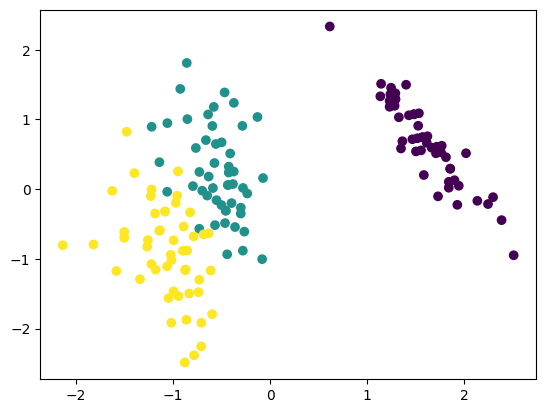

In [36]:
import matplotlib.pyplot as plt

plt.scatter(x=new_df['pc1'],y=new_df['pc2'],
            c=new_df['species'])

plt.show()
